In [3]:
import pandas as pd 

# import 'Numpy' 
import numpy as np

# import subpackage of Matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

# import 'Seaborn' 
import seaborn as sns

# to suppress warnings 
from warnings import filterwarnings
filterwarnings('ignore')

# display all columns of the dataframe
pd.options.display.max_columns = None

# display all rows of the dataframe
pd.options.display.max_rows = None
 
# to display the float values upto 6 decimal places     
pd.options.display.float_format = '{:.6f}'.format

# import train-test split 
from sklearn.model_selection import train_test_split

# import StandardScaler to perform scaling
from sklearn.preprocessing import StandardScaler 

from scipy.cluster.hierarchy import linkage,dendrogram,cophenet

np.set_printoptions(suppress=True)

from sklearn.metrics.pairwise import euclidean_distances

from sklearn.cluster import AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer

In [4]:
data=pd.read_csv('tsne_scores.csv')
data.head()

,t-SNE-1,t-SNE-2
0,10.846841,-16.712580
1,24.794334,-16.775398
2,2.953309,13.379048
3,27.262146,-31.886690
4,-23.015728,64.468376


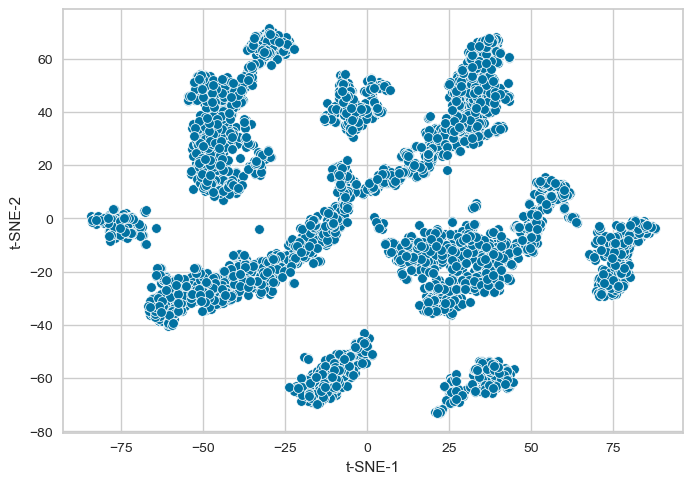

In [5]:
sns.scatterplot(data['t-SNE-1'],data['t-SNE-2'])
plt.show()

In [6]:
data.describe()

,t-SNE-1,t-SNE-2
count,4406.000000,4406.000000
mean,0.567441,1.415244
std,41.019609,35.880629
min,-84.150955,-73.312280
25%,-36.900561,-23.300937
50%,-0.768416,-3.387099
75%,32.839062,32.923441
max,87.763040,71.366740


### 1. KMeans Clustering:

In [11]:
n_clus=range(2,12)
sil_score=[]
wcss=[]
for i in n_clus:
    model=KMeans(n_clusters=i)
    model.fit(data)
    pred=model.predict(data)
    wcss.append(model.inertia_)
    sil_score.append(silhouette_score(data,pred))
    
sil_score

[0.39192759237532815,
 0.42114609415352633,
 0.44651523908279983,
 0.46257979460303916,
 0.4724028012388215,
 0.4941826985787323,
 0.5270443030633077,
 0.5194315767076579,
 0.5226411683811943,
 0.5360946609062046]

In [12]:
wcss

[7535772.827747478,
 4751131.766337408,
 3305298.8287347862,
 2447934.3977731066,
 1912903.2532258683,
 1535724.5347666852,
 1286120.6993719866,
 1054498.4947485777,
 865360.7498623489,
 732766.7224044289]

In [9]:
k_elbow = KElbowVisualizer(KMeans(),k=12)

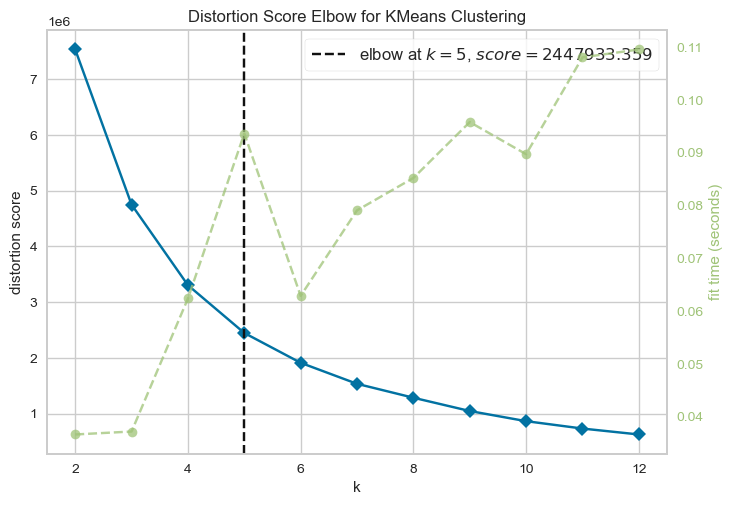

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [10]:
k_elbow.fit(data)
k_elbow.show()

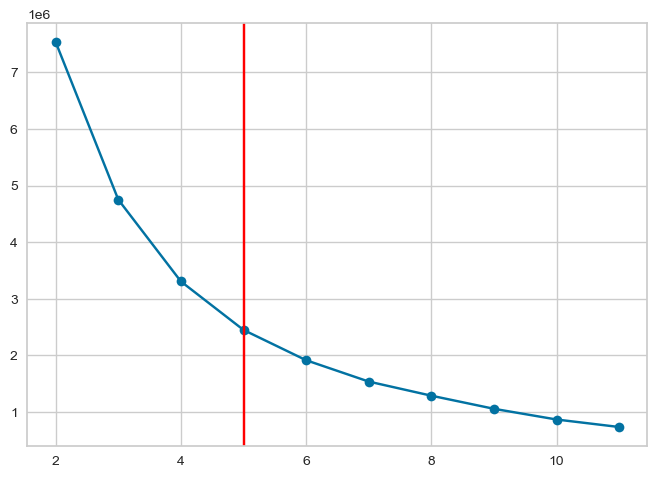

In [13]:
# Elbow plot
plt.plot(n_clus,wcss,marker='o')
plt.axvline(x=5,color='red')
plt.show()

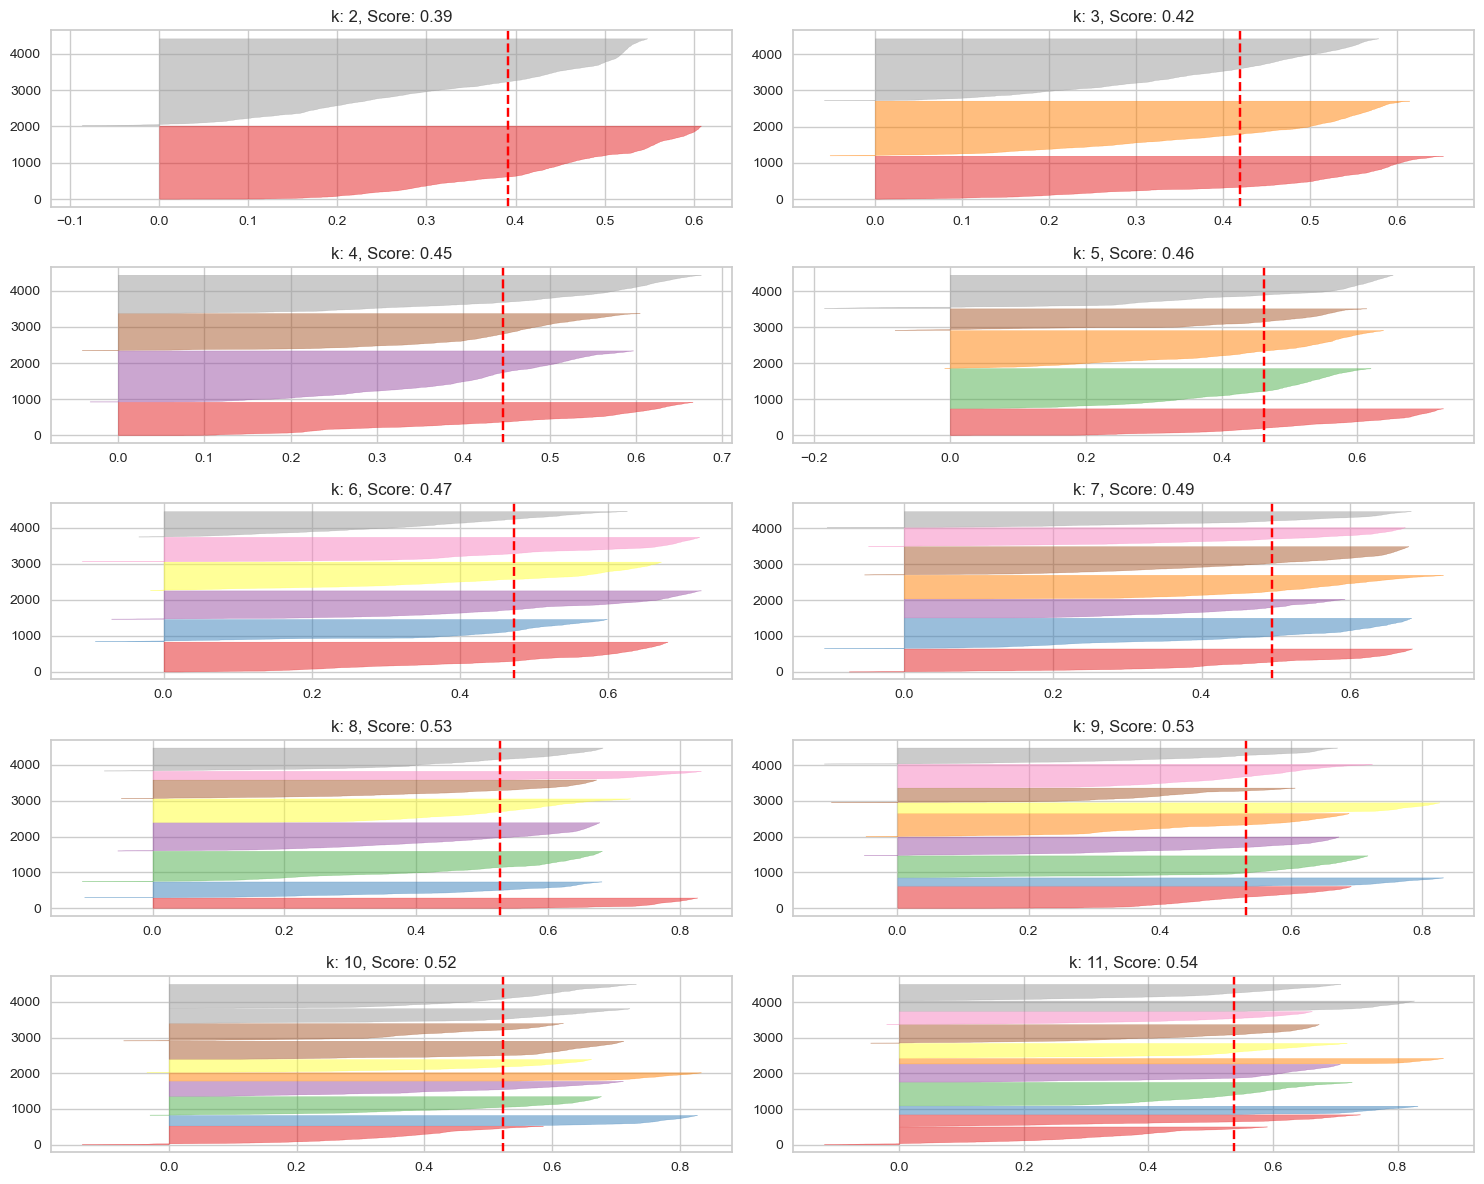

In [22]:
t=1
plt.figure(figsize=(15,12))
for i in n_clus:
    plt.subplot(5,2,t)
    model = KMeans(n_clusters=i)
    sil_viz = SilhouetteVisualizer(model)
    sil_viz.fit(data)
    plt.title('k: %s, Score: %.2f'%(i,sil_viz.silhouette_score_))
    t+=1
plt.tight_layout()
plt.show()

In [23]:
final_model5 = KMeans(n_clusters=5)

In [24]:
final_model5.fit(data)

KMeans(n_clusters=5)

In [25]:
y_pred_Kmeans5 = final_model5.predict(data)

In [26]:
centroids5 = final_model5.cluster_centers_

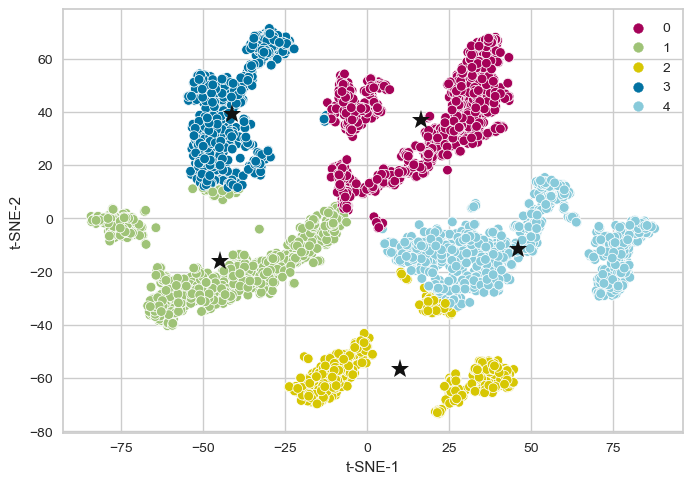

In [27]:
sns.scatterplot(x=data['t-SNE-1'],y=data['t-SNE-2'],
               hue=y_pred_Kmeans5,palette=['m','g','y','b','c'])
for i in range(5):    
    plt.plot(centroids5[i][0],centroids5[i][1],marker='*',ms=14,color='k')
plt.show()

In [28]:
final_model9 = KMeans(n_clusters=9)

final_model9.fit(data)

y_pred_Kmeans9 = final_model9.predict(data)

centroids9 = final_model9.cluster_centers_

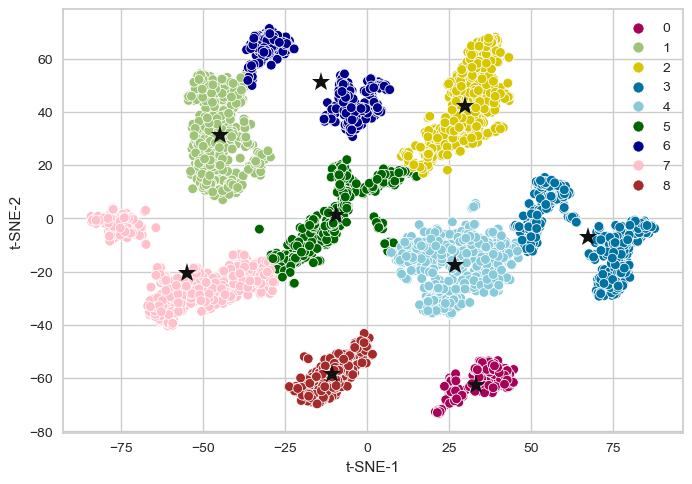

In [30]:
sns.scatterplot(x=data['t-SNE-1'],y=data['t-SNE-2'],
               hue=y_pred_Kmeans9,palette=['m','g','y','b','c','darkgreen','darkblue','pink','brown'])
for i in range(9):    
    plt.plot(centroids9[i][0],centroids9[i][1],marker='*',ms=14,color='k')
plt.show()

### 2. Agglomerative Clustering:

In [32]:
link_matrix=linkage(data,method='ward')

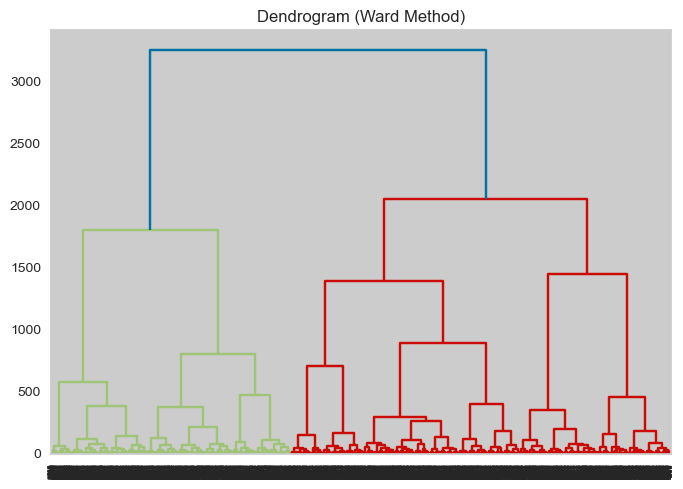

In [33]:
#Dendrogram:
plt.title('Dendrogram (Ward Method)')
dendrogram(link_matrix)
plt.show()

In [34]:
agglo_model2=AgglomerativeClustering(n_clusters=2)

y_pred2=agglo_model2.fit_predict(data)

In [35]:
distance_matrix_ward=euclidean_distances(data)

In [37]:
actual_dist_ward=distance_matrix_ward[np.triu_indices(4406,k=1)]

### 3. DBSCAN:

In [38]:
actual_dist_ward.min()

0.0054062992869863755

In [39]:
actual_dist_ward.max()

171.97392307718363

In [40]:
epsilon=range(5,16)
minsamp=range(4,12)

In [43]:
for e in epsilon:
    for m in minsamp:
        model=DBSCAN(eps=e,min_samples=m)
        pred=model.fit_predict(data)
        print('Epsilon: %.2f  Min. Samples: %d  Silhouette Score: %.3f'%(e,m,silhouette_score(data,pred)))

Epsilon: 5.00  Min. Samples: 4  Silhouette Score: 0.114
Epsilon: 5.00  Min. Samples: 5  Silhouette Score: 0.114
Epsilon: 5.00  Min. Samples: 6  Silhouette Score: 0.114
Epsilon: 5.00  Min. Samples: 7  Silhouette Score: 0.114
Epsilon: 5.00  Min. Samples: 8  Silhouette Score: 0.111
Epsilon: 5.00  Min. Samples: 9  Silhouette Score: 0.164
Epsilon: 5.00  Min. Samples: 10  Silhouette Score: 0.164
Epsilon: 5.00  Min. Samples: 11  Silhouette Score: 0.164
Epsilon: 6.00  Min. Samples: 4  Silhouette Score: 0.095
Epsilon: 6.00  Min. Samples: 5  Silhouette Score: 0.095
Epsilon: 6.00  Min. Samples: 6  Silhouette Score: 0.095
Epsilon: 6.00  Min. Samples: 7  Silhouette Score: 0.095
Epsilon: 6.00  Min. Samples: 8  Silhouette Score: 0.095
Epsilon: 6.00  Min. Samples: 9  Silhouette Score: 0.219
Epsilon: 6.00  Min. Samples: 10  Silhouette Score: 0.219
Epsilon: 6.00  Min. Samples: 11  Silhouette Score: 0.219
Epsilon: 7.00  Min. Samples: 4  Silhouette Score: 0.155
Epsilon: 7.00  Min. Samples: 5  Silhouette S

In [44]:
final_model=DBSCAN(eps=6,min_samples=9)

pred_dbscan=final_model.fit_predict(data)

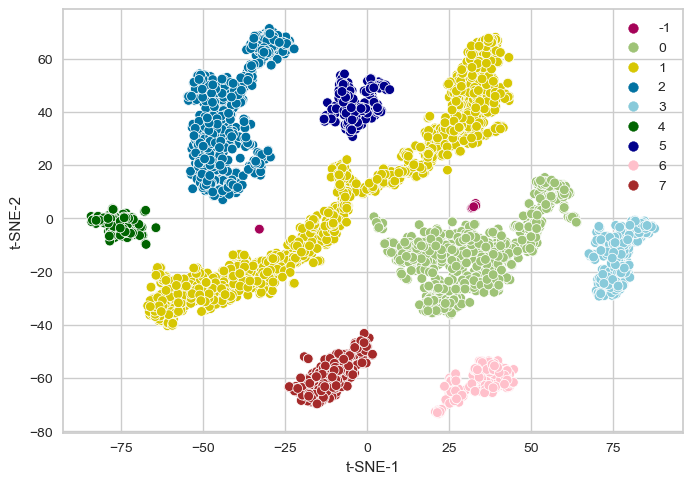

In [45]:
sns.scatterplot(x=data['t-SNE-1'],y=data['t-SNE-2'],
               hue=pred_dbscan,palette=['m','g','y','b','c','darkgreen','darkblue','pink','brown'])
plt.show()